# Scaling Exercises

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sklearn.preprocessing

import os
import wrangle
from env import host, user, password
from scipy import stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
houses = wrangle.wrangle_zillow()

In [3]:
houses.head()

,bedrooms,bathrooms,indoor_sqft,tax_value,yearbuilt,tax_amount,fips,sale_date
0,4,3.5,3100,1023282,1998,11013.72,6059,2017-01-01
1,2,1.0,1465,464000,1967,5672.48,6111,2017-01-01
2,3,2.0,1243,564778,1962,6488.30,6059,2017-01-01
3,4,3.0,2376,145143,1970,1777.51,6037,2017-01-01
4,4,3.0,2962,773303,1950,9516.26,6037,2017-01-01


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52222 entries, 0 to 52441
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     52222 non-null  int64  
 1   bathrooms    52222 non-null  float64
 2   indoor_sqft  52222 non-null  int64  
 3   tax_value    52222 non-null  int64  
 4   yearbuilt    52222 non-null  int64  
 5   tax_amount   52222 non-null  float64
 6   fips         52222 non-null  int64  
 7   sale_date    52222 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 3.6+ MB


<font color=“brown”>**Creating a scaled DF and and non-scaled DF for exploration**</font>

In [12]:
# Not scaled train DF

# Splits df into train_validate and test using train_test_split()
train_validate, test = train_test_split(houses, test_size=.2, random_state=175)

# splits train_validate into train and validate using train_test_split()
train, validate = train_test_split(train_validate, test_size=.3, random_state=175)

In [13]:
train

,bedrooms,bathrooms,indoor_sqft,tax_value,yearbuilt,tax_amount,fips,sale_date
51735,3,3.0,2878,119273,1983,2264.63,6037,2017-09-14
30756,3,2.0,1272,298739,1955,3877.47,6037,2017-06-12
33234,3,2.0,1472,156485,1977,1531.40,6059,2017-06-22
47705,4,2.0,1233,197034,1955,2305.46,6111,2017-08-25
4895,4,3.0,1951,298610,1979,4174.00,6037,2017-02-01
...,...,...,...,...,...,...,...,...
28999,4,3.0,3087,1081843,1984,12885.42,6037,2017-06-02
51459,5,6.0,6533,804596,1989,9646.98,6037,2017-09-13
13067,3,2.0,1242,65093,1965,1508.98,6059,2017-03-23
29911,3,2.0,1328,521062,1940,6290.54,6037,2017-06-07


In [15]:
validate.shape

(12534, 8)

In [16]:
test.shape

(10445, 8)

# Scaling

bedrooms


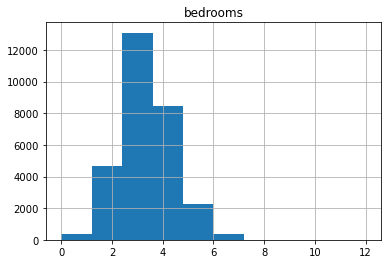

bathrooms


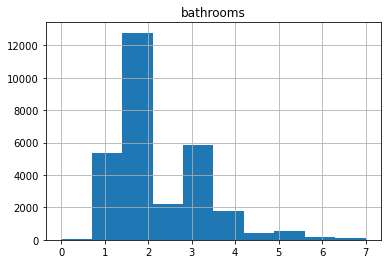

indoor_sqft


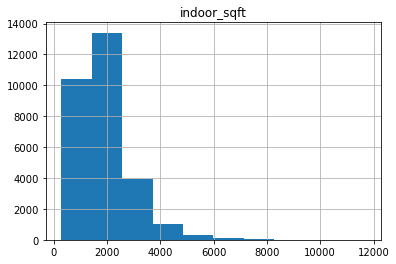

tax_value


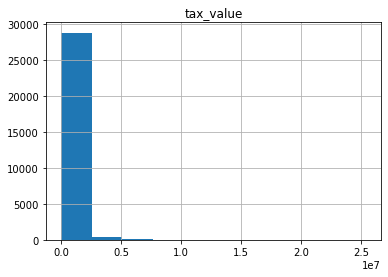

yearbuilt


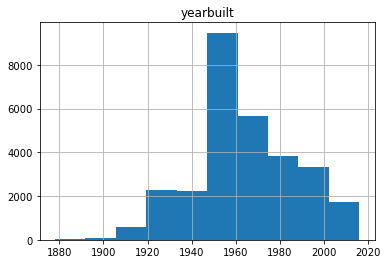

tax_amount


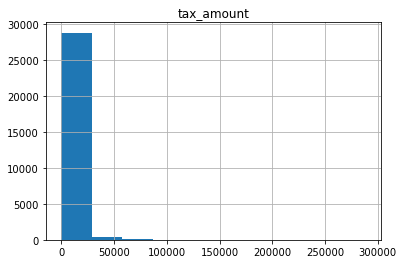

fips


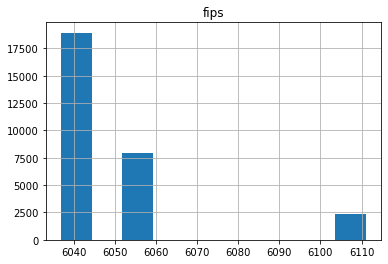

sale_date


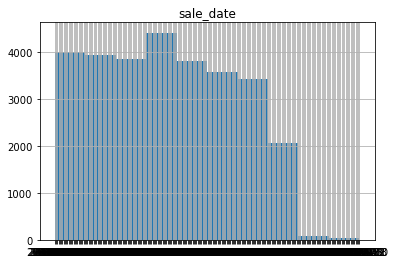

In [27]:
# Visualizing each column to have a reference for scaled data

for column in train.columns:
    print(column)
    plt.title(column)
    train[column].hist()
    plt.grid(True)
    plt.show()

bedrooms


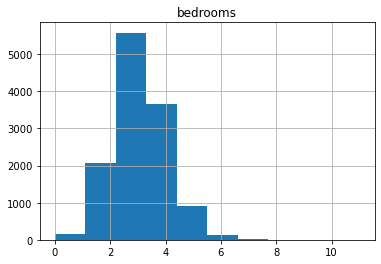

bathrooms


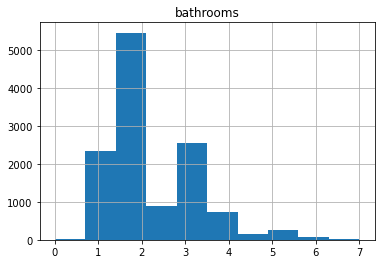

indoor_sqft


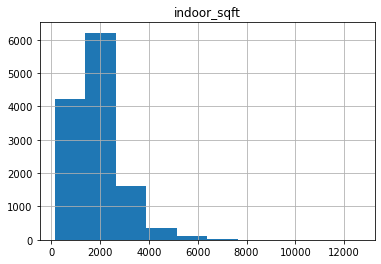

tax_value


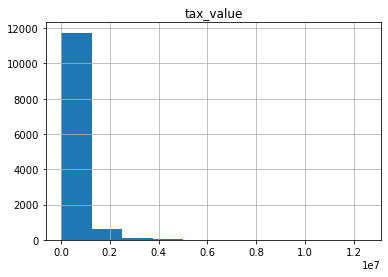

yearbuilt


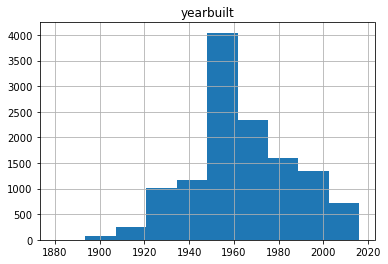

tax_amount


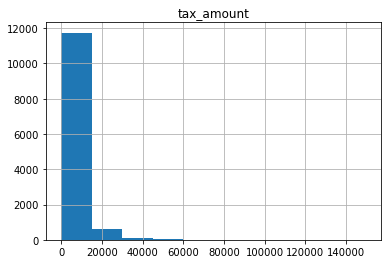

fips


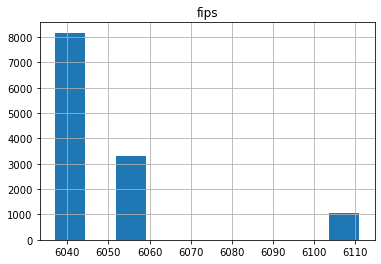

sale_date


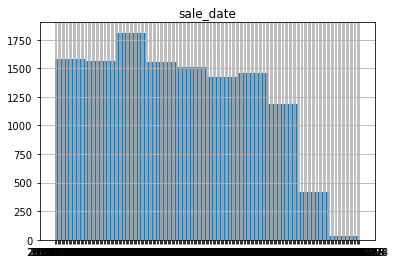

In [28]:
for column in validate.columns:
    print(column)
    plt.title(column)
    validate[column].hist()
    plt.grid(True)
    plt.show()

bedrooms


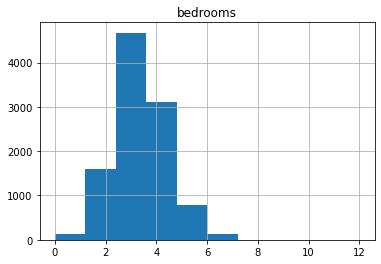

bathrooms


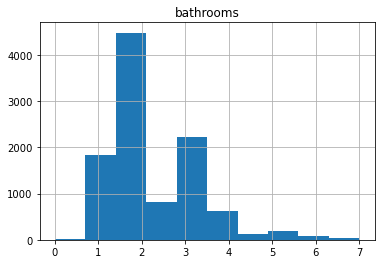

indoor_sqft


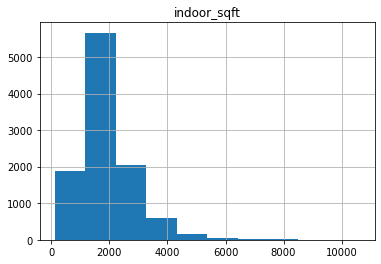

tax_value


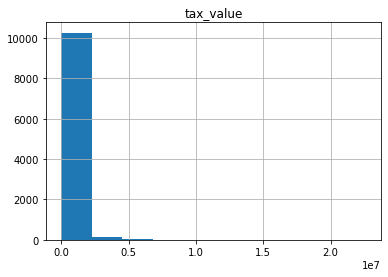

yearbuilt


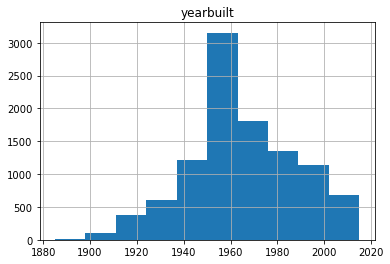

tax_amount


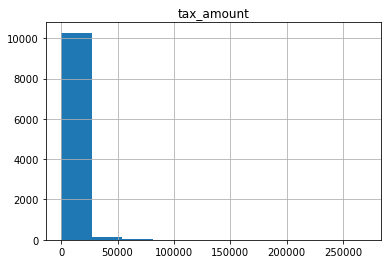

fips


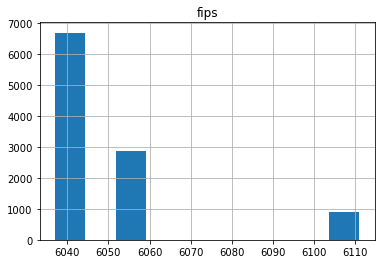

sale_date


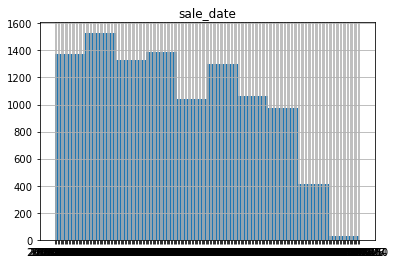

In [29]:
for column in test.columns:
    print(column)
    plt.title(column)
    test[column].hist()
    plt.grid(True)
    plt.show()

## Min-Max Scaling

In [30]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

ValueError: could not convert string to float: '2017-09-14'